In [ ]:
!git clone https://github.com/DrikDrik/sber-movqgan-project

In [ ]:
import sys
sys.path.append('/content/sber-movqgan-project/')

In [ ]:
!pip install pip==24.0
!pip install -r 'sber-movqgan-project/requirements.txt'

In [ ]:
from models.DDPM.model import generate_new_images
from pipeline.movqgan import decode
from pipeline.show import show_images

In [ ]:
from utils.imports import *

In [ ]:
from pipeline.movqgan import get_model, decode
model = get_model()

In [ ]:
from models.DDPM.model import DDPM, generate_new_images, UNet
device='cuda'
n_steps, min_beta, max_beta = 1000, 0.0001, 0.02
ddpm = DDPM(UNet(), n_steps=n_steps, min_beta=min_beta, max_beta=max_beta, device=device)

In [ ]:
import gdown
weight_url = "https://drive.google.com/uc?export=download&id=1bFkk9Wd5Y-ndsbInitEoDVZRAE-4gKVc"
model_path = "ddpm_model.ckpt"
import gdown
def download_model_weights(url, output_path='ddpm_model.ckpt'):
    gdown.download(url, output_path, quiet=False)

def load_ddpm_weights_from_ckpt(ddpm, weight_path='ddpm_model.ckpt'):
    checkpoint = torch.load(weight_path)
    ddpm.load_state_dict(checkpoint)
    print(f"Модель успешно загружена из {weight_path}")

In [ ]:
download_model_weights(weight_url, model_path)
load_ddpm_weights_from_ckpt(ddpm, model_path)

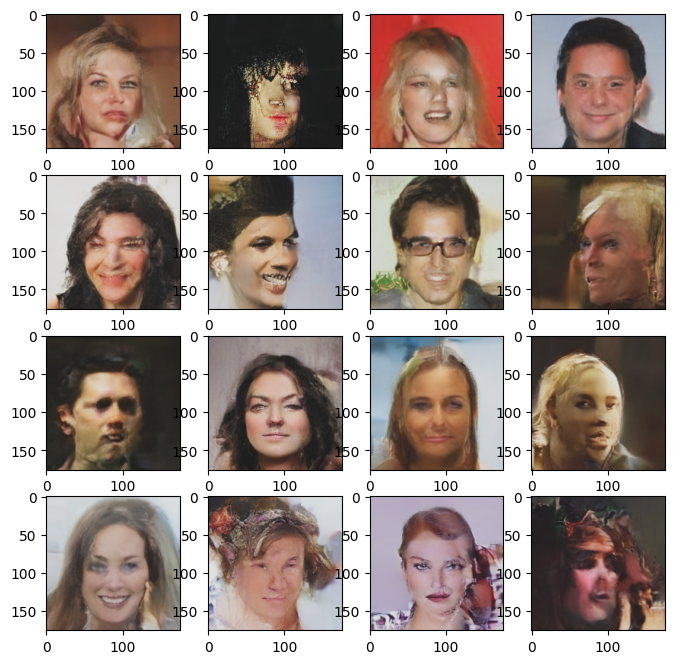

In [ ]:
ddpm.eval()
show_images(F.tanh(decode(model, generate_new_images(ddpm, n_samples=16, c=4, h=22, w=22, device=device))))